<a href="https://colab.research.google.com/github/fboldt/aulasml/blob/master/aula11b_perceptron_bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(20, 2)
(20,)


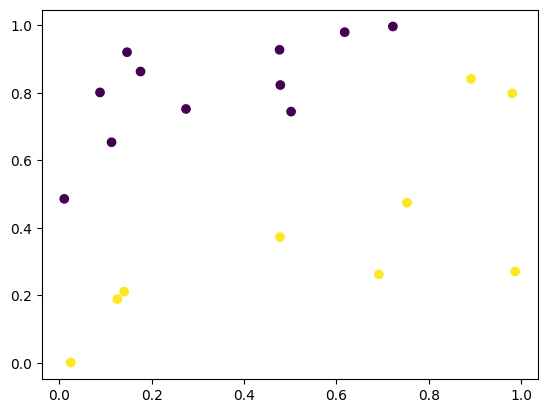

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def criaDataset(n=20, intercept=0.2):
  X = np.random.uniform(size=(n,2))
  AUX = X - [0, intercept]
  y = np.array(AUX[:,0]>AUX[:,1], dtype=int) * 2 - 1
  return X, y

X, y = criaDataset()
print(X.shape)
print(y.shape)

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

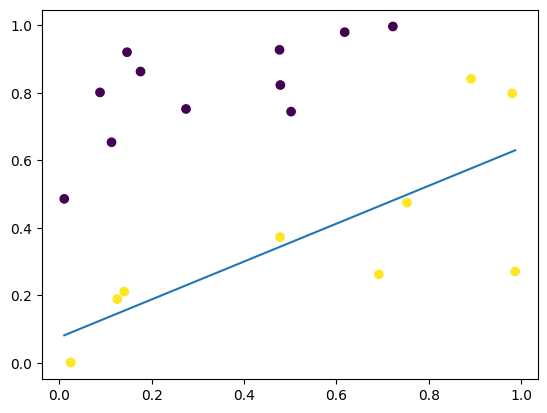

In [64]:
def plotHiperplano(X, y, vetor, intercept=0):
  x0min = np.min(X[:,0])
  x0max = np.max(X[:,0])
  xs = np.linspace(x0min, x0max, 2)
  ys = (-vetor[0]/vetor[1])*xs - intercept/vetor[1]
  plt.plot(xs, ys)
  plt.scatter(X[:,0], X[:,1], c=y)


plotHiperplano(X, y, [1.47764758, -2.63271997], 0.2)
plt.show()

1.0
[ 0.48049163  2.16978098 -2.32043639]


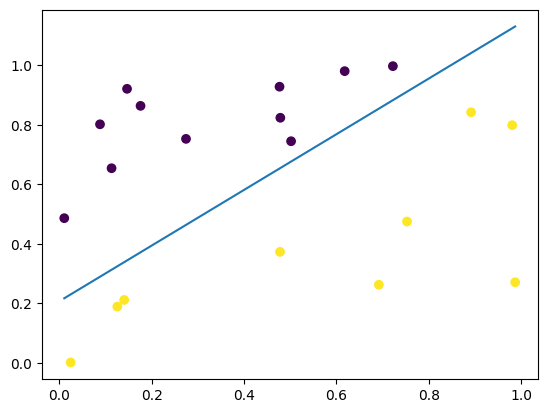

0.985


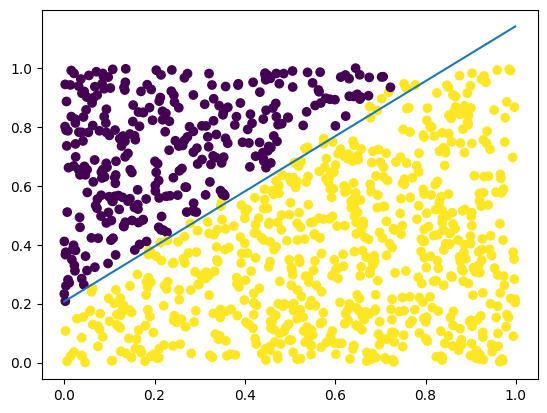

In [71]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

def sign(a):
  if a >= 0:
    return 1
  else:
    return -1

def include_bias(X):
  return np.insert(X, 0, 1, axis=1)

class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, max_iter=1000, learning_rate=0.1):
    self.max_iter = max_iter
    self.learning_rate = learning_rate

  def fit(self, X, y):
    Xb = include_bias(X)
    self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
    for _ in range(self.max_iter):
      ypred = self.predict(X)
      erros = (y - ypred)
      if sum(erros) == 0:
        break
      self.w += np.dot(erros, Xb)*self.learning_rate
    return

  def predict(self, X):
    Xb = include_bias(X)
    return np.array([sign(np.dot(x, self.w)) for x in Xb])


clf = Perceptron()
clf.fit(X, y)
ypred = clf.predict(X)
print(accuracy_score(y, ypred))
print(clf.w)


plotHiperplano(X, y, clf.w[1:], clf.w[0])
plt.show()


Xt, yt = criaDataset(1000)
ypredt = clf.predict(Xt)
print(accuracy_score(yt, ypredt))


plotHiperplano(Xt, yt, clf.w[1:], clf.w[0])
plt.show()